In [1]:
from random import sample, randint
import json

In [2]:
def create(valid_coordinates):
    
    for i in range(1, 501):
        colors = ["red", "blue", "green"]
        coordinates = valid_coordinates
        
        outname = "test" + str(i) + ".json"
        
        no_pieces = randint(1,4)
        piece_loc = sample(coordinates, no_pieces)
        
        no_blocks = randint(0, 6)
        potential_loc = [i for i in coordinates if i not in piece_loc]
        block_loc = sample(potential_loc, no_blocks)
        
        data = {"colour": ''.join(sample(colors,1)),
               "pieces": piece_loc,
               "blocks": block_loc}

        with open(outname, 'w') as outfile:
            json.dump(data, outfile)

In [3]:
valid_coordinates = ((-3, 0), (-3, 1), (-3, 2), (-3, 3),
                    (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3),
                    (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3),
                    (0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3),
                    (1, -3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2),
                    (2, -3), (2, -2), (2, -1), (2, 0), (2, 1),
                    (3, -3), (3, -2), (3, -1), (3, 0))

# BENCHMARK 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [15]:
import subprocess
import matplotlib.pyplot as plt
from collections import defaultdict
import json
import os
import psutil
import time
import seaborn as sns
directory = os.path.normpath("C:\\Users\\Akira Wang\\Documents\\GitHub\\COMP30024\\Chexers\\Part A\\test-files")
files = [i for i in os.listdir() if '.json' in i]

In [11]:
# User, System Time
user_time = defaultdict(list)
system_time = defaultdict(list)

nodes_generated = defaultdict(list)

In [12]:
for file in files:
    start = time.time()
    proc = subprocess.Popen(['python', 'search.py',  file], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    end = time.time()
    # nodes generated, solution
    output = proc.communicate()[0].split()

    try:
        sol = int(output[1])
    except:
        print(output)
        continue
    
    user_time[sol].append(float(end - start))
    
    if int(output[0]) > 80000:
        print(file)
    
    nodes_generated[sol].append(int(output[0]))

muppet1.json
muppet2.json
over_30_test432.json


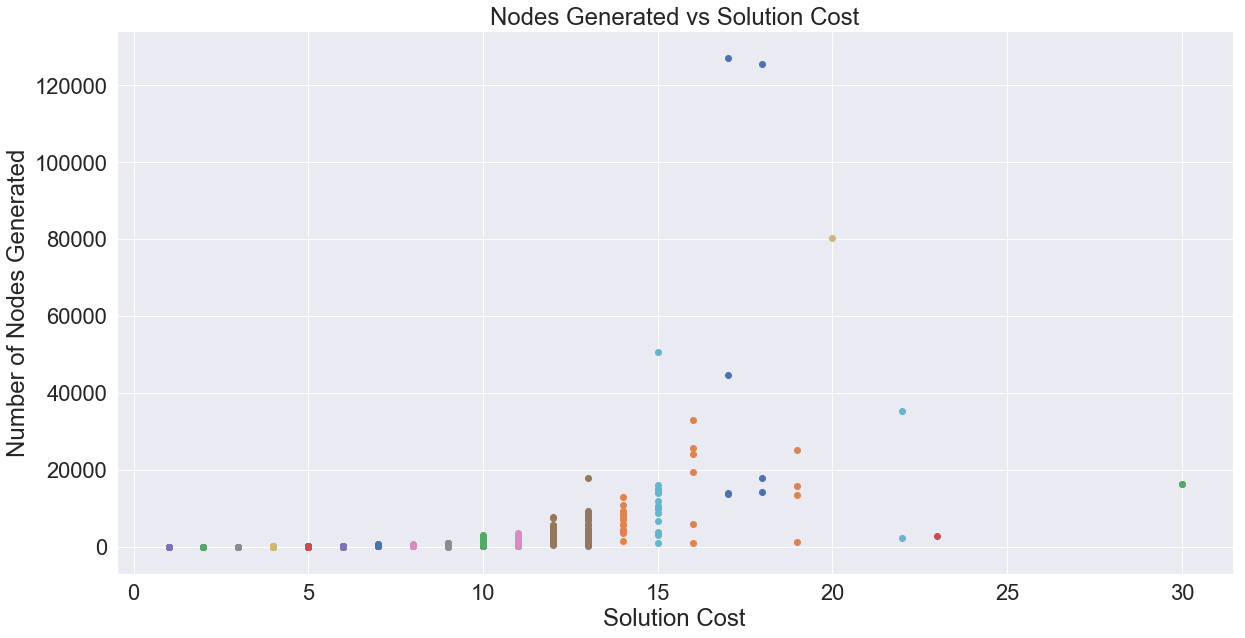

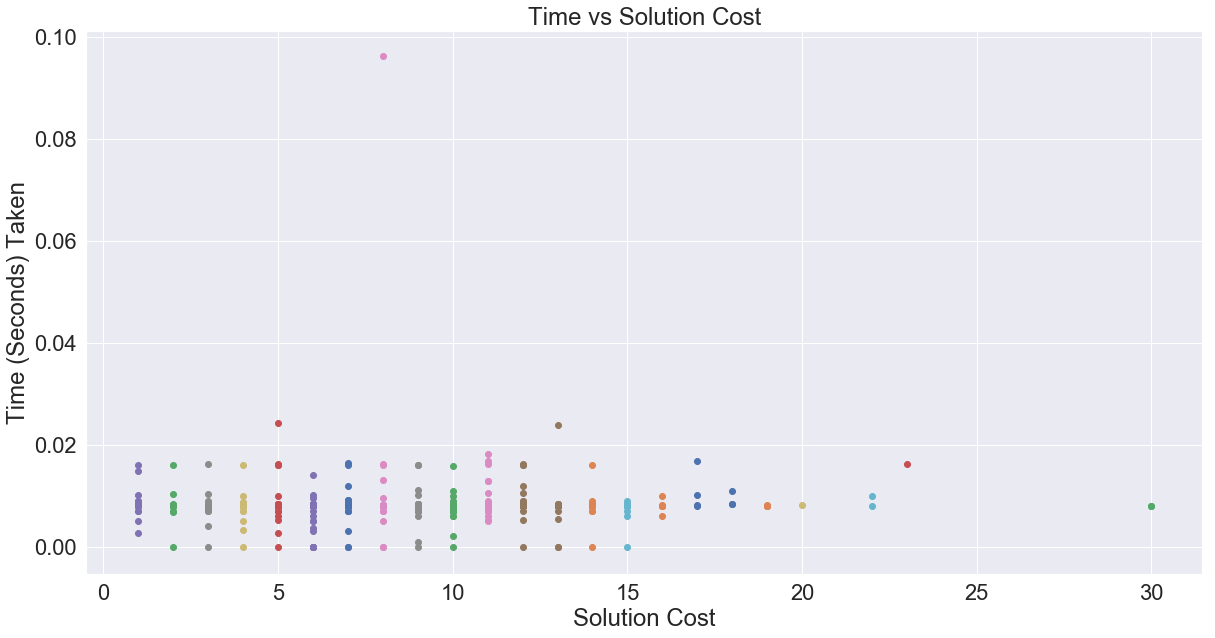

In [17]:
sns.set_palette('hls', 4)
sns.set(font_scale=2)

plt.figure(figsize=(20,10))

for i in nodes_generated.keys():
    plt.scatter([i for j in range(len(nodes_generated[i]))], nodes_generated[i])
plt.title('Nodes Generated vs Solution Cost')
plt.ylabel('Number of Nodes Generated')
plt.xlabel('Solution Cost')
plt.savefig()
plt.show()

plt.figure(figsize=(20,10))
for i in nodes_generated.keys():
    # plt.scatter([i for j in range(len(system_time[i]))], system_time[i], color = 'orange')
    plt.scatter([i for j in range(len(user_time[i]))], user_time[i])
plt.title('Time vs Solution Cost')
plt.ylabel('Time (Seconds) Taken')
plt.xlabel('Solution Cost')
plt.show()